#Ex01

Estudante: [SOLUÇÃO]

##A) Vamos guerrear?

No jogo de tabuleiro de estratégia chamado War (ou Risk), um jogador  com até três soldados simultaneamente, enquanto o jogador defensor pode defender com até dois soldados. No caso de exatamente três atacantes e dois defensores, o jogo se resolve da seguinte forma: o jogador atacante lança três dados vermelhos enquanto o jogador defensor lança dois dados azuis. Depois comparam-se os maiores lançamentos do atacante e do defensor. O menor valor perde um soldado, no caso de valores iguais o atacante perde um soldado. Em seguida, os segundos maiores números também são comparados da mesma maneira. Assim, a batalha tem três resultados possíveis: o atacante perde dois soldados, cada lado perde 1 soldado, o defensor perde dois soldados.

O exemplo abaixo mostra um caso em que o atacante usou 3 soldados e o defensor 2 soldados (os máximos permitidos pelas regras do jogo). O jogador atacante tirou 2, 1 e 6, enquanto o defensor tirou 3 e 2. Primeiramente, comparam-se os maiores valores (6 do atacante contra 3 do defensor) e neste caso o defensor perde um soldado. Depois disso, compara-se o segundo maior valor obtido por cada um dos jogadores. Neste caso, há empate, o qual é sempre em favor do defensor, então o atacante perde um soldado. O dado de menor valor do atacante não é usado. O saldo final é um soldado perdido para cada jogador.

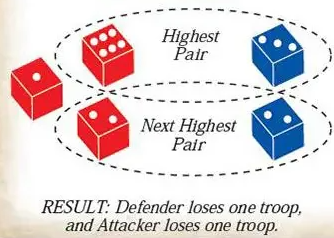

Com base nas regras explicadas, calcule a probabilidade de cada um dos eventos possíveis neste tipo de ataque (3 soldados atacantes contra 2 soldados defensores). **Calcule tanto a probabilidade teórica quanto a probabilidade experimental**.

###Probabilidade Teórica

Calcule a probabilidade exata dos três resultados examinando todos os casos possíveis. A probabilidade é a razão entre os casos favoráveis ​​e o número total de casos. Escreva os resultados com 5 casas decimais.

**Resposta**


Este problema já foi investigado em alguns artigos listados abaixo.

1. [Tan, Baris. Markov Chains and the RISK Board Game. Mathematics Magazine, 1997.](https://www.jstor.org/stable/pdf/2691171.pdf?refreqid=excelsior%3Afd38343517e58df990529177f29031d2&ab_segments=&origin=&initiator=&acceptTC=1)
2. [Jason A. Osborne, Markov Chains for the RISK Board Game Revisited](https://www4.stat.ncsu.edu/~jaosborn/research/RISK.pdf) (Este artigo corrige alguns resultados do anterior)

A resposta abaixo segue estes textos.

---

Em uma jogada de 3 dados (o ataque) temos um total de $6^3 = 216$ possibilidades. Assumindo que $D^3_M$ é o valor do maior dado na jogada 3 dados e $D^3_m$ é o segundo maior dado, então (usando um pouco de análise combinatória) temos:

$$P(D^3_M = x \; \cap  \; D^3_m = y) = \left\{
  \begin{array}{ll}
      \frac{3x-2}{216} & x=y \\
      \frac{6y-3}{216} & x \gt y \\
      0 & x \lt y \\
  \end{array}
  \right.
$$

Também podemos definir a função abaixo:

$P(D^3_M > x \; \cap \; D^3_m > y) = \sum_{z_1=x+1}^{6}\sum_{z_2=y+1}^{z_1} P(D^3_M = z_1 \; \cap  \; D^3_m = z_2)$

Em uma jogada de 2 dados (a defesa) temos um total de $6^2 = 36$ possibilidades. Assumindo que $D^2_M$ é o valor do maior dado na jogada 2 dados e $D^2_m$ é o segundo maior dado, então (usando um pouco de análise combinatória) temos:

$$P(D^2_M = x \; \cap  \; D^2_m = y) = \left\{
  \begin{array}{ll}
      \frac{1}{36} & x=y \\
      \frac{2}{36} & x \gt y \\
      0 & x \lt y \\
  \end{array}
  \right.
$$

Também podemos definir:

$P(D^2_M \geq x \; \cap \; D^2_m \geq y) = \sum_{z_1=x}^{6}\sum_{z_2=y}^{z_1} P(D^2_M = z_1 \; \cap  \; D^2_m = z_2)$

A questão pede para determinar cada um dos resultados desejados. Assim para o caso em que o defensor perde 2 dados, temos:

$P(\text{Defensor perde 2 soldados}) = P(D^3_M > D^2_M \; \cap \; D^3_m > D^2_m) \\
\; = \sum_{x=1}^{5} \sum_{y=1}^{x} P(D^3_M > x \; \cap \; D^3_m > y)P(D^2_M = x \; \cap \; D^2_m = y)$

$P(\text{Atacante perde 2 soldados}) = P(D^2_M \geq D^3_M \; \cap \; D^2_m \geq D^3_m) \\
\; = \sum_{x=1}^{6} \sum_{y=1}^{x} P(D^2_M \geq x \; \cap \; D^2_m \geq y)P(D^3_M = x \; \cap \; D^3_m = y)$

$P(\text{Cada jogador perde 1 soldado}) = 1 - P(\text{Defensor perde 2 soldados}) - P(\text{Atacante perde 2 soldados})$

Abaixo segue a implementação destas equações seguida do cálculo.

In [ ]:
def p3dice(x,y):
  if x > y:
    return (6*y -3)/216
  elif x == y:
    return (3*x - 2)/216
  else:
    return 0 #x < y

def p3diceFun1(x,y): #P(X>x;Y>y)
  p = 0
  for z1 in range(x+1,7): #7 = 6+1, devido a funcao range
    for z2 in range(y+1,z1+1): #z1+1 devido a funcao range
      p += p3dice(z1,z2)
  return p

def p3diceFun2(x,y): #P(X>x;Y<y)
  p = 0
  for z1 in range(x+1,7): #7 = 6+1, devido a funcao range
    for z2 in range(1,y): #y = y-1+1 devido a funcao range
      p += p3dice(z1,z2)
  return p

def p2dice(x,y):
  if x > y:
    return 2/36
  elif x == y:
    return 1/36
  else:
    return 0 #yM < ym

def p2diceFun1(x,y): #P(X>=x;Y>=y)
  p = 0
  for z1 in range(x,7): #7 = 6+1, devido a funcao range
    for z2 in range(y,z1+1): #z1+1 devido a funcao range
      p += p2dice(z1,z2)
  return p

def p2diceFun2(x,y): #P(X>x;Y<y)
  p = 0
  for z1 in range(x+1,7): #7 = 6+1, devido a funcao range
    for z2 in range(1,y+1): #y+1 = y devido a funcao range
      p += p2dice(z1,z2)
  return p

#Atacante perde 2 soldados
p20 = 0
for x in range(1,7): #1..6
  for y in range(1,x+1): #1..x
    p20 += p2diceFun1(x,y)*p3dice(x,y)

#Defensor perde 2 soldados
p02 = 0
for x in range(1,6): #1..5
  for y in range(1,x+1): #1..x
    p02 += p3diceFun1(x,y)*p2dice(x,y)

#Cada jogador perde 1
p11 = 1 - p20 - p02

print('Probabilidade do atacante perder 2 soldados =', str(round(p20,3)))
print('Probabilidade de cada um perder 1 soldado =', str(round(p11,3)))
print('Probabilidade do defensor perder 2 soldados =', str(round(p02,3)))

Probabilidade do atacante perder 2 soldados = 0.293
Probabilidade de cada um perder 1 soldado = 0.336
Probabilidade do defensor perder 2 soldados = 0.372


### Probabilidade Experimental

Procure entender o código abaixo e modifique o método ```confronto()``` para definir o resultado de uma jogada. O resultado deve informar a quantidade de soldados perdidos pelo atacante (```a``` ) e pelo defensor (```d``` ).

Além deste método, modifique também a função ```jogaWar()``` para computar as probabilidades de cada evento de interesse. Você só precisa mudar as linhas onde as variáveis ```p20```, ```p11``` e ```p02``` são inicializadas.

Gere resultados com 1.000 jogadas e com 100.000 jogadas.

In [1]:
import random

class Dado():
    def __init__(self):
      self.valores = range(1,7)
    def joga(self):
      return random.choice(self.valores)

class War():
    # sAtk: quantidade de soldados usados no ataque, valor padrão 3
    # sDef: quantidade de soldados usados na defesa, valor padrão 2
    def __init__(self,sAtk=3,sDef=2):
      self.Atk = []
      self.Def = []
      for i in range(sAtk):
        self.Atk.append(Dado())
      for i in range(sDef):
        self.Def.append(Dado())

    def __str__(self):
      return "War"

    def setAtk(self,sAtk):
      self.Atk = []
      for i in range(sAtk):
        self.Atk.append(Dado())

    def setDef(self,sDef):
      self.Def = []
      for i in range(sDef):
        self.Def.append(Dado())

    def jogaAtk(self):
      rolagem = []
      for dado in self.Atk:
        rolagem.append(dado.joga())
      return rolagem

    def jogaDef(self):
      rolagem = []
      for dado in self.Def:
        rolagem.append(dado.joga())
      return rolagem

    def confronto(self):
      '''
        Função que define o resultado de um confronto
        Retorno: uma tupla (a,d), onde a é a quantidade
        de soldados perdida pelo atacante e d é a quantidade de
        soldados perdida pelo defensor
      '''
      rolagemAtk = self.jogaAtk()
      rolagemDef = self.jogaDef()
      a = 0
      d = 0

      ##Código adicionado
      rolagemAtk.sort(reverse=True)
      rolagemDef.sort(reverse=True)
      for i in range(min(len(rolagemAtk),len(rolagemDef))):
        if rolagemAtk[i] > rolagemDef[i]:
          d += 1
        else:
          a += 1
      ##Fim do código adicionado
      return (a,d)

def jogaWar(jogo, numJogadas, imprimir = True):
    tot20, tot11, tot02 = 0.0, 0.0, 0.0 #contam cada evento de interesse
    for i in range(numJogadas):
        a,d = jogo.confronto()
        tot20 += 1 if a == 2 and d == 0 else 0
        tot11 += 1 if a == 1 and d == 1 else 0
        tot02 += 1 if a == 0 and d == 2 else 0
    if imprimir:
        print(numJogadas, 'jogadas do jogo', jogo)
        p20 = tot20/numJogadas #defina aqui a probabilidade do atacante perder 2 soldados
        p11 = tot11/numJogadas #defina aqui a probabilidade de cada um perder 1 soldado
        p02 = tot02/numJogadas #defina aqui a probabilidade do defensor perder 2 soldados
        print('Probabilidade do atacante perder 2 soldados =', str(round(p20,3)))
        print('Probabilidade de cada um perder 1 soldado =', str(round(p11,3)))
        print('Probabilidade do defensor perder 2 soldados =', str(round(p02,3)))

numJogadas = 1000
jogo = War()
jogaWar(jogo, numJogadas)

numJogadas = 100000
jogo = War()
jogaWar(jogo, numJogadas)

1000 jogadas do jogo War
Probabilidade do atacante perder 2 soldados = 0.291
Probabilidade de cada um perder 1 soldado = 0.34
Probabilidade do defensor perder 2 soldados = 0.369
100000 jogadas do jogo War
Probabilidade do atacante perder 2 soldados = 0.293
Probabilidade de cada um perder 1 soldado = 0.338
Probabilidade do defensor perder 2 soldados = 0.37


## B) Atacando com grandes tropas

Para além da regra explicada anteriormente, no jogo War, caso o atacante possua 2 soldados em uma localidade, apenas 1 deles pode ser usado para atacar a localidade vizinha; se possuir 3, apenas 2 podem ser usados; e se possuir 4 ou mais soldados, pode-se usar o máximo de 3 soldados, como explicado anteriormente.

Além disso, durante seu turno, o jogador pode atacar um adversário quantas vezes desejar, desde que tenha 2 ou mais soldados na localidade. Assim, uma estratégia básica do jogo é acumular um grande número de soldados em uma localidade e desferir sucessivos ataques até eliminar os soldados do vizinho, ou até reduzir seu próprio exército a um número mínimo de sua escolha (como 3 soldados, por exemplo).

Com base nisso, estime a probabilidade de forma experimental, **de um jogador atacante com 10 soldados tomar uma localidade defendida por 3 soldados**. O jogador atacante vai parar os ataques ou quando restar somente 3 soldados em seu domínio, ou quando restar nenhum soldado do defensor.

Para responder esta questão, faça uso da classe ```WarSucessivo()``` definida abaixo. Um experimento neste caso, será a execução do método ```confrontoSucessivo()``` até que uma das duas condições seja atingida: os soldados do defensor acabem; ou os soldados do atacante se reduzam a 3.

Cada confronto, pode ser simulado pelo método ```confronto()```, o qual é herdado pela classe ```WarSucessivo()```, já que esta classe é filha da classe ```War()```. Portanto o método ```confronto()``` não precisa ser reimplementado. Após a execução do método ```confronto()``` atualize as quantidades de soldados de ataque e defesa. Verifique as condições de parada e, caso não nenhuma seja atingida, faça uma nova simulação de confronto.

Um cuidado importante é que o método ```confronto()``` usa as quantidades de soldados predefinidas na classe ```War()```, para os atributos ```Atk``` e ```Def```. Estes atributos foram configurados para 3 e 2, que são os máximos permitidos pela regra. Contudo, se o defensor tiver apenas 1 soldado, deve-se modificar o valor de ```Def``` para 1. Para isso lembre-se de chamar o método ```setDef()```, antes de chamar ```confronto()``` novamente.

Gere resultados com 1.000 jogadas e com 100.000 jogadas.

In [5]:
class WarSucessivo(War):
  def __init__(self):
    War.__init__(self)

  def __str__(self):
    return 'War Sucessivo'

  def confrontoSucessivo(self,Atk=10,Def=3):
    '''
      Este método executa sucessivos confrontos até que
      uma das condições seja atingida.
      Retorno: 1 caso o atacante tenha conquistado a
      localidade; e 0 caso não tenha.
    '''
    ##Código adicionado
    self.setAtk(3)
    self.setDef(2)
    while (Atk > 3 and Def > 0):
      (a,d) = self.confronto()
      Atk -= a
      Def -= d
      if Atk < 3:
        self.setAtk(Atk)
      if Def == 1:
        self.setDef(1)
    if (Def == 0 and Atk > 0):
      return 1
    else:
      return 0
    ##Fim do código adicionado

def jogaWarSucessivo(numJogadas, imprimir = True):
  totConq = 0.0 #conta cada evento de conquista da loclidade
  for i in range(numJogadas):
    jogo = WarSucessivo()
    totConq += jogo.confrontoSucessivo()
    del jogo
  if imprimir:
    print(numJogadas, 'jogadas')
    pConq = totConq/numJogadas
    print('Probabilidade do atacante conquistar a localidade =', str(pConq))

numJogadas = 1000
jogaWarSucessivo(numJogadas)
numJogadas = 100000
jogaWarSucessivo(numJogadas)

1000 jogadas
Probabilidade do atacante conquistar a localidade = 0.942
100000 jogadas
Probabilidade do atacante conquistar a localidade = 0.94157


# Conclusão

Agora é o momento de pensar sobre os resultados.

Procure discutir abaixo os resultados obtidos do item A) destacando aspectos como: diferenças entre os valores teóricos e experimentais; e diferenças observadas com o aumento do número de jogadas. No item B) procure discutir sobre a dificuldade de obter probabilidades teóricas na estratégia de grandes tropas.

Pode-se comentar:


*   No item A), os valores teóricos chegam próximo dos experimentais, mas a diferença depende do número de jogadas. Com 1000 jogadas, as diferenças ficam a partir da segunda casa decimal; e com 100.000 jogadas, as diferenças ficam na terceira casa.
  * Em outras palavras, ao usar mais jogadas (amostras) obtivemos melhores estimativas.
*   O cômputo da probabilidade teórica é complexo tanto no item A) quanto no item B). Há um número elevado de combinações (7776) possíveis em um ataque de 3 dados contra 2 dados, e há sutilezas na mecânica do confronto (ranqueamento dos dados e o terceiro dado de ataque) que dificultam enxergar os eventos de interesse.
* Uma forma interessante de calcular as probabilidades teóricas do item A) é usar o computador para enumerar todos os possíveis casos e avaliar cada um deles quanto ao resultado desejado (atacante perde 2 soldados e defensor perde 0; atacante perde 0 e defensor perde 2 soldados; e cada um perde 1). Abaixo mostramos este código.


In [ ]:
from itertools import product as prod

dado = range(1,7)
cnt = {
        (0,2):0,
        (1,1):0,
        (2,0):0
      }

Omega = prod(dado,repeat=5)
n = 0
for resultado in Omega:
  resultado = list(resultado)
  rolagemAtk = resultado[0:3]
  rolagemDef = resultado[3:]
  rolagemAtk.sort(reverse=True)
  rolagemDef.sort(reverse=True)
  #print(rolagemAtk,rolagemDef)
  a = 0
  d = 0
  for i in range(min(len(rolagemAtk),len(rolagemDef))):
    if rolagemAtk[i] > rolagemDef[i]:
      d += 1
    else:
      a += 1
  cnt[(a,d)] += 1
  n += 1

p20 = cnt[(2,0)]/n
p11 = cnt[(1,1)]/n
p02 = cnt[(0,2)]/n
print('Probabilidade do atacante perder 2 soldados =', str(round(p20,3)))
print('Probabilidade de cada um perder 1 soldado =', str(round(p11,3)))
print('Probabilidade do defensor perder 2 soldados =', str(round(p02,3)))


Probabilidade do atacante perder 2 soldados = 0.293
Probabilidade de cada um perder 1 soldado = 0.336
Probabilidade do defensor perder 2 soldados = 0.372


* No item B) o cálculo das probabilidades teóricas é ainda mais complexo, porque precisaríamos capturar a estratégia do atacante em manter-se combatendo ou parar, o que depende dos resultados obtidos nos confrontos anteriores. Para resolver este tipo de problema, seria preciso modelá-lo como um Processo Estocástico tal como relatado no artigo [2].
* Não é possível comparar diretamente os resultados obtidos no item B ao resultado estimado na Table 3 vista em [2]. Isto ocorre porque as estimativas de probabilidade da tabela são feitas com o atacante usando até o último soldado disponível, uma estratégia diferente da que estamos assumindo. Neste caso, a chance do atacante ganhar são maiores na Table 3 do que nas probabilidades obtidas no item B.